=== METRIK EVALUASI ===
Accuracy: 0.9613333333333334
Precision: 0.9634597392271811
Recall: 0.9613333333333334
F1-Score: 0.9616581892755013


C:\Users\bimod\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\bimod\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\bimod\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(


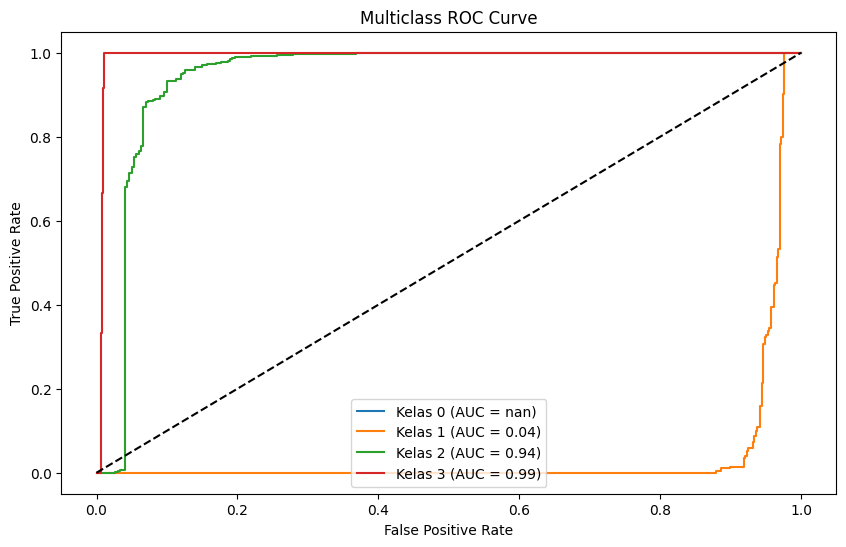

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score, roc_curve, 
                             confusion_matrix, classification_report)
from sklearn.impute import SimpleImputer
import mglearn

# 1. Load Data
df = pd.read_csv('CitarumWater.csv', na_values=['-'])

# 2. Preprocessing
# Hapus kolom tidak perlu
df = df.drop(columns=['No', 'NamaSungai', 'TitikPantau', 'Waktu', 'O2'])

# Konversi suhu ke float (PENTING: lakukan SEBELUM imputasi!)
df['Temp'] = df['Temp'].str.replace('°C', '', regex=True).astype(float)

# Handle missing values
numeric_cols = ['pH', 'Temp', 'TSS', 'DO', 'BOD', 'COD', 'Nitrat', 'FecalColiform', 'Fosfat', 'IP']
imputer = SimpleImputer(strategy='mean')
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

# 3. Split Data
X = df.drop(columns=['Class'])
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=42, 
    stratify=y
)

# 4. Normalisasi
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Bangun Model
model = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=1000,
    class_weight='balanced',
    random_state=42
)
model.fit(X_train_scaled, y_train)

# 6. Evaluasi
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)

print("=== METRIK EVALUASI ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1-Score:", f1_score(y_test, y_pred, average='weighted'))

# 7. ROC-AUC (Multiclass)
n_classes = len(np.unique(y))
plt.figure(figsize=(10,6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test, y_proba[:,i], pos_label=i)
    auc_score = roc_auc_score(y_test == i, y_proba[:,i])
    plt.plot(fpr, tpr, label=f'Kelas {i} (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend()
plt.show()



Penjelasan Matematika
Persamaan Logistic Regression:
- P(y=1|X) = 1 / (1 + e^(-(β₀ + β₁X₁ + ... + βₙXₙ)))

Fungsi logistik mengubah output linear (log-odds) ke range [0,1]

- β: Koefisien model yang akan dioptimasi
- e: Bilangan natural (≈2.71828)

Maximum Likelihood Estimation (MLE):
- L(β) = Π P(yⁱ|Xⁱ; β)
Mencari β yang memaksimalkan likelihood (L) dari data observasi
Dilakukan dengan optimasi numerik (contoh: gradient descent)

Matriks Evaluasi:

Akurasi:
- (TP + TN) / (TP + TN + FP + FN)

Presisi:
- TP / (TP + FP)

Recall:
- TP / (TP + FN)

F1-Score:
- 2 * (Presisi * Recall) / (Presisi + Recall)

AUC-ROC:

Area di bawah kurva ROC yang memplot TPR vs FPR
- TPR = TP/(TP+FN), FPR = FP/(FP+TN)

Multinomial Logistic Regression:
Menggunakan softmax function untuk multi-class:
- P(y=k|X) = e^(β_k·X) / Σ e^(β_j·X)
Maksimalkan log-likelihood untuk multi-class